<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/Seaborn_regplot_lmplot_%EB%B9%84%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EA%B7%B8%EB%9E%98%ED%94%84_residplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


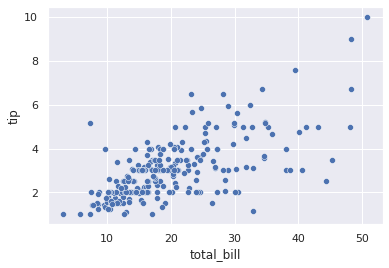

In [2]:
sns.scatterplot(data=tips, x = 'total_bill', y = 'tip')

regplot

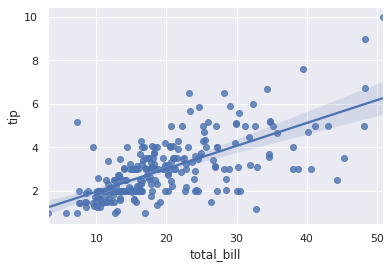

In [3]:
sns.regplot(data=tips, x = 'total_bill', y = 'tip')

lmplot
- regplot와 다르게 hue속성을 사용할수 있다

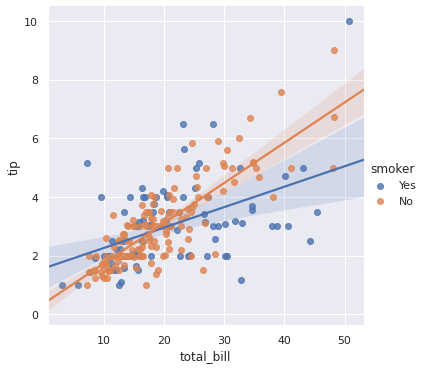

In [4]:
sns.lmplot(data=tips, x = 'total_bill', y = 'tip', hue='smoker',
           truncate= False)

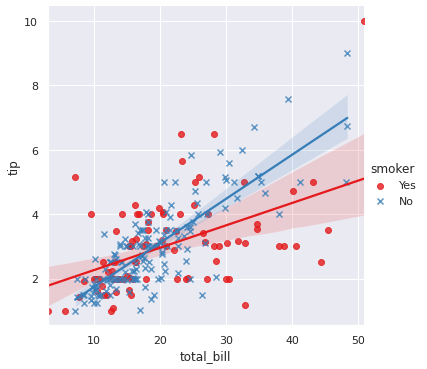

In [29]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

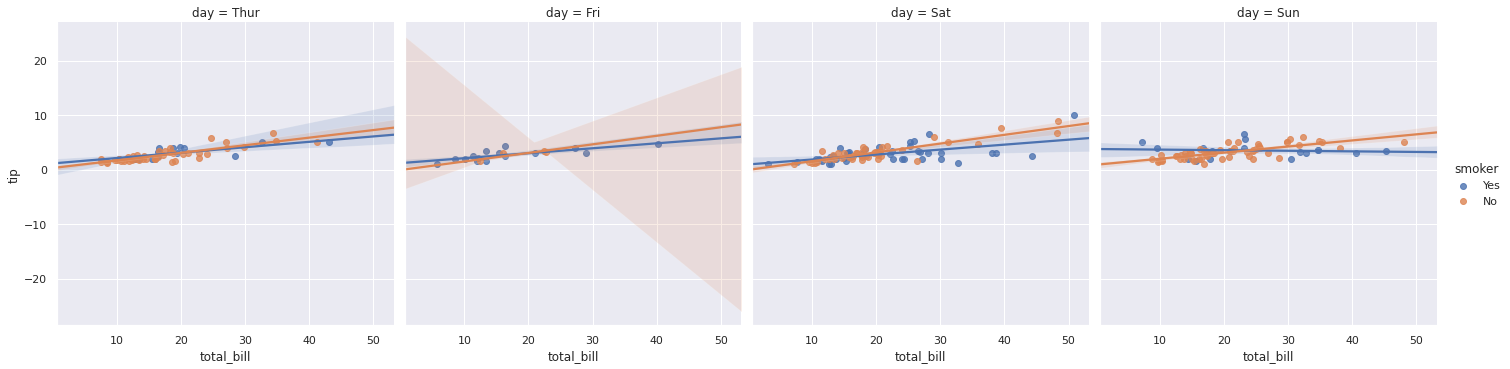

In [31]:
sns.lmplot(data=tips, x = 'total_bill', y = 'tip', hue='smoker',
           truncate= False,
           col='day') 

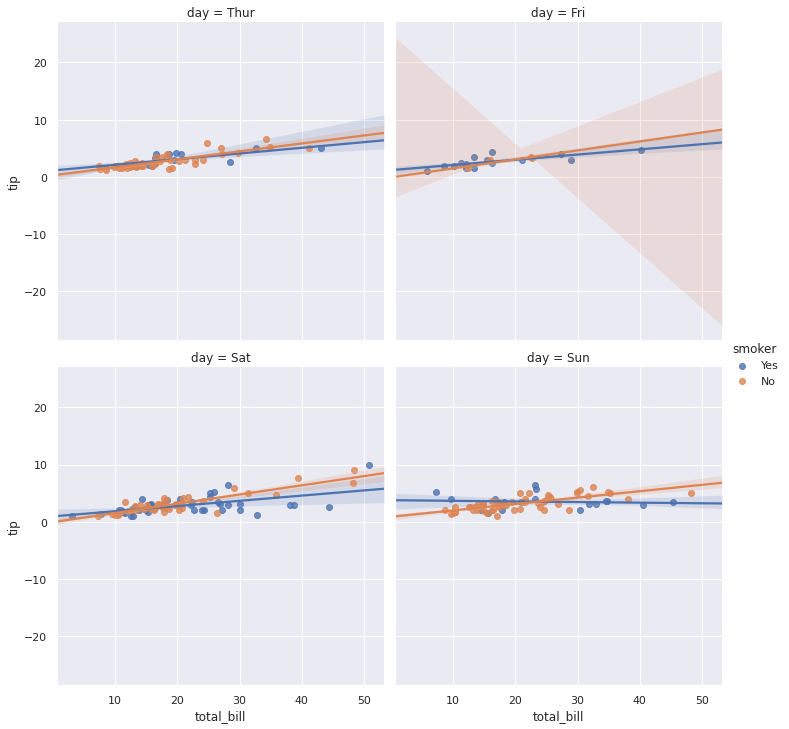

In [5]:
sns.lmplot(data=tips, x = 'total_bill', y = 'tip', hue='smoker',
           truncate= False,
           col='day', col_wrap = 2) # col_wrap 한행에 2개씩만 그래프를 나타내라

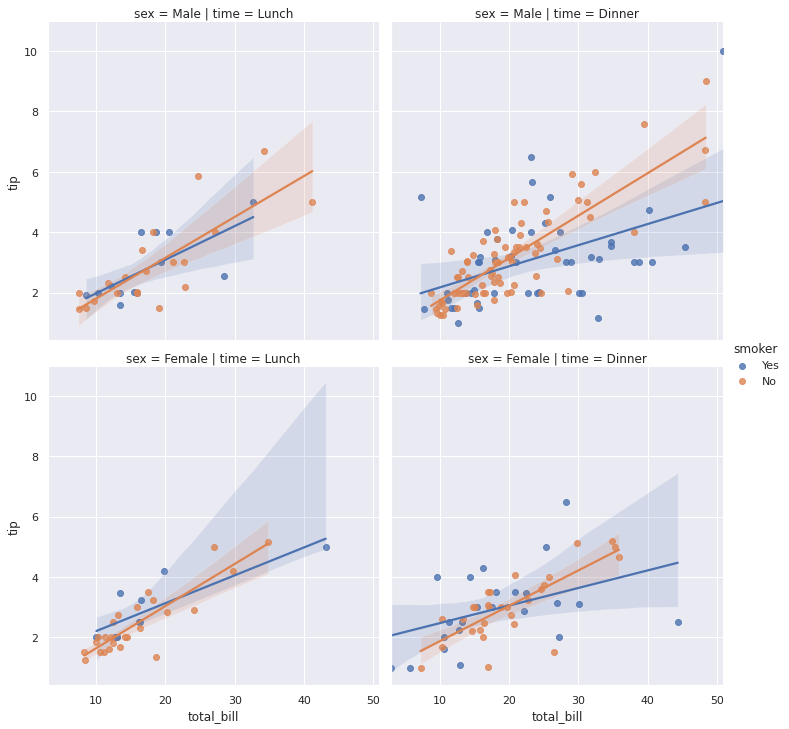

In [30]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

In [6]:
tips.corr() # 상관관계값

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [7]:
tips.groupby(['smoker']).corr() # smoker여부에 따라 상관관계 따로 연산

total_bill       tip      size
smoker                                           
Yes    total_bill    1.000000  0.488218  0.527890
       tip           0.488218  1.000000  0.332227
       size          0.527890  0.332227  1.000000
No     total_bill    1.000000  0.822183  0.688068
       tip           0.822183  1.000000  0.580107
       size          0.688068  0.580107  1.000000

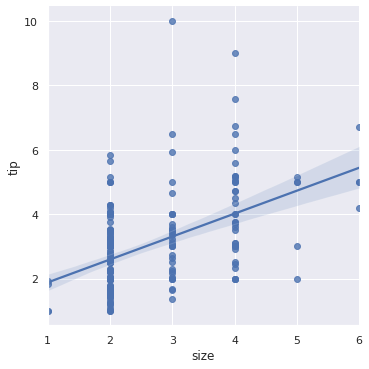

In [8]:
sns.lmplot(x="size", y="tip", data=tips);

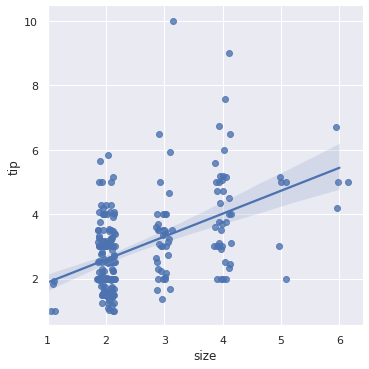

In [9]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.15); # 밀집된 빈도를 일정간격 벌려서 볼수있다

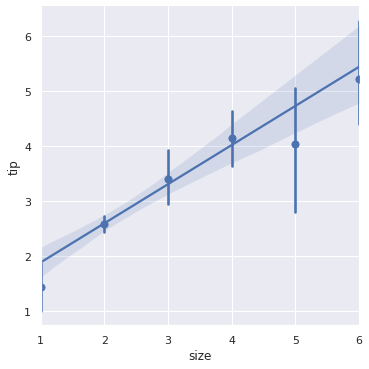

In [10]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean); # size가 5인경우 막대가 길게 그려졌는데 샘플이 적고 벌어져있어 신뢰구간이 커져서 그렇다
                                                               # x_estimator의 값을 mean으로 함으로서 각 구간별 평균값을 점으로 표시

In [11]:
anscombe = sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


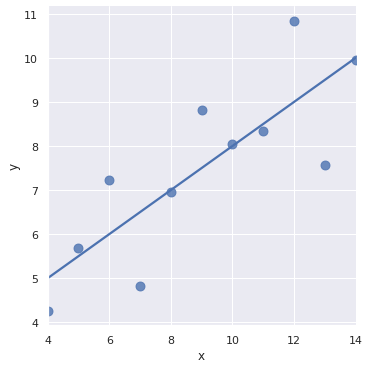

In [12]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), # 항목중 dataset의 'I' 데이터만 불러옴
           ci=None, scatter_kws={"s": 80}); # scatter_kws는 scatter의 키워드 약자이며 's;는 포인트사이즈를 의미한다

선형으로 그릴경우 데이터의 성질을 제대로 표현하지 못하고 있다

따라서 비선형으로 그려야한다

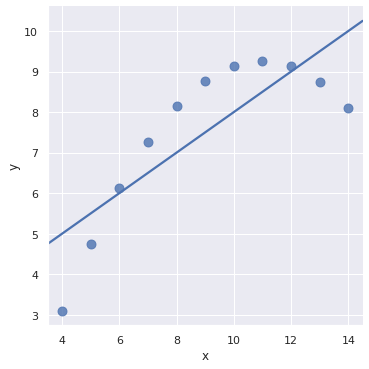

In [14]:
# 선형으로 그릴경우
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), 
           ci=None, scatter_kws={"s": 80},
           truncate=False); # 그래프가 잘려서 보이는부분 제거

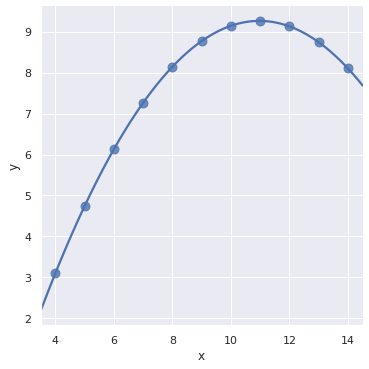

In [17]:
# 비선형으로 그릴경우
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), 
           ci=None, scatter_kws={"s": 80},
           truncate=False,
           order=2);  # 1로 설정할경우 선형 2로설정할 경우 비선형으로 그린다

이상치때문에 그래프를 잘못그리는 경우
- 이상치를 제외하고 그리도록 한다

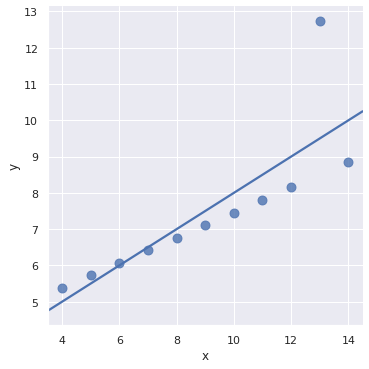

In [18]:
# 이상치를 제거하지 않은경우
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), 
           ci=None, scatter_kws={"s": 80},
           truncate=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


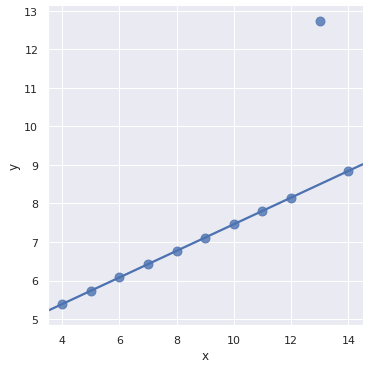

In [19]:
# 이상치를 제거한 경우
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), 
           ci=None, scatter_kws={"s": 80},
           truncate=False,
           robust=True) # 이상치 제거

In [22]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15 # 데이터중 나누어 연산한값이 0.15보다 클경우 True로 아닐경우 False로하여 새로생성한 big_ltips항목안에 넣는다

분류형 데이터
- 로지스틱을 사용한다

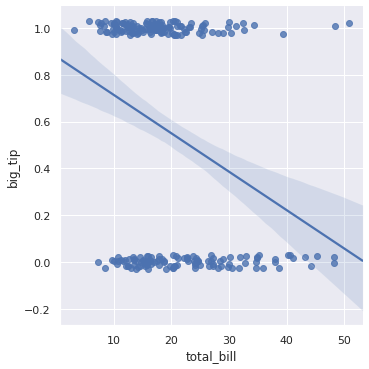

In [23]:
# 로지스틱을 사용하지 않은경우
sns.lmplot(x="total_bill", y="big_tip", data=tips, truncate=False,
           y_jitter=.03);

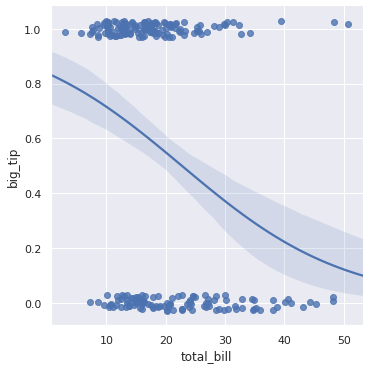

In [25]:
# 로지스틱을 사용한경우
sns.lmplot(x="total_bill", y="big_tip", data=tips,truncate=False,
           logistic=True, y_jitter=.03);

다항식(극소회귀)

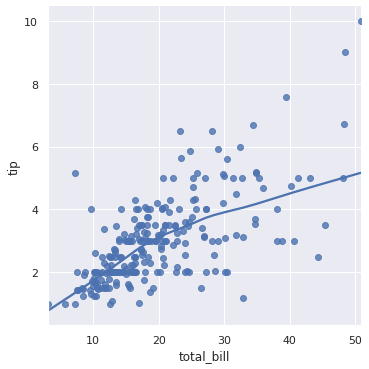

In [26]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True); # 다항식

# residplot
- 회귀선으로부터 얼마나 같이 떨어져 있는지 시각화 해준다

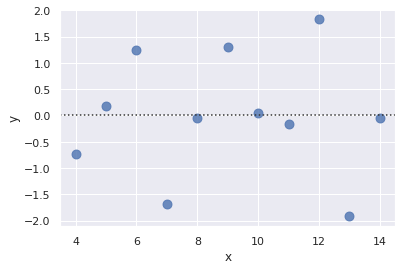

In [27]:
# 회기선을 0으로 만들어서 얼마나 떨어져 있는지 보여준다
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

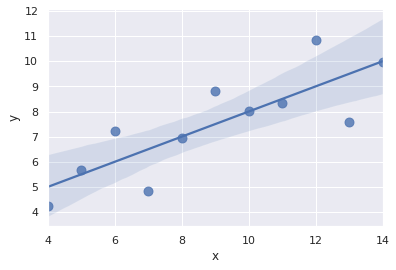

In [28]:
sns.regplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});